This notebook compares the BART errored data and that errored by tab-err

All data comes from clean HOSP

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [73]:
bart_df = pd.read_csv("../output/dirty_person.csv", index_col=False)

ecar_df = pd.read_csv("../output/ecar_typo_hosp_tab_err.csv", index_col=False)
ecar_mask_df = pd.read_csv("../output/ecar_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

enar_df = pd.read_csv("../output/enar_typo_hosp_tab_err.csv", index_col=False)
enar_mask_df = pd.read_csv("../output/enar_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

ear_df = pd.read_csv("../output/ear_typo_hosp_tab_err.csv", index_col=False)
ear_mask_df = pd.read_csv("../output/ear_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

In [74]:
# Count errors in BART dataset

# Function to count cells with exactly 3 asterisks - corresponds to BART error strategy
def count_three_asterisks(cell):
    cell_str = str(cell)  # Convert everything to string
    return 1 if cell_str.count('*') == 3 else 0

def create_error_mask_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates a binary DataFrame mask where 1 indicates a cell
    containing exactly three asterisks ('*'), and 0 otherwise.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame of the same shape with 0s and 1s.
    """
    # Use applymap to apply the lambda function to every single element
    # of the DataFrame. The lambda function returns 1 if the string
    # representation of the cell has exactly 3 asterisks, and 0 otherwise.
    error_mask_df = df.map(lambda x: 1 if str(x).count('*') == 3 else 0)
    return error_mask_df

def create_error_bar_chart(error_mask: pd.DataFrame):
    """
    Creates a bar chart visualizing the number of errors per column.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """

    # Sum the errors for each column
    column_error_counts = error_mask.sum()

    # Get the column names for the x-axis
    columns = column_error_counts.index

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(columns, column_error_counts, color='skyblue')
    plt.xlabel('Column Number')
    plt.ylabel('Number of Errors')
    plt.title('Number of Errors Per Column')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [75]:
# Apply function to all cells
bart_error_prop = bart_df.stack().map(lambda x: str(x).count('*') == 3).sum()/ (bart_df.shape[0]*bart_df.shape[1])
print(f"Proportion of cells with exactly 3 '*' characters: {bart_error_prop}")

bart_mask_df = create_error_mask_df(bart_df)

# We gotta re-run BART but first set up some analysis since you may have to do that anyhow -- rerunning once is better than twice.

Proportion of cells with exactly 3 '*' characters: 0.18085


In [76]:
bart_df.head(10)

,index,providernumber,hospitalname,address1,address2,address3,city,state,zipcode,countyname,phonenumber,hospitaltype,hospitalowner,emergencyservice,condition,measurecode,measurename,score,sample,stateaverage
0,1,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,empty,empty,al_scip-card-2
1,2,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-1
2,3,10018,callahan** eye foun*dation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,*y*e*s,surgical infection prevention,scip-inf-2,surgery patients who were given the right kin...,empty,empty,al_scip-inf-2
3,4,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2*05325*81*00,acute care hospitals,voluntary non-profit - private,*ye**s,surgical infection prevention,scip-inf-3,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-3
4,5,10018,call**ahan eye foundation hospit*al,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,*2*0*53258100,acute care hospitals,voluntary non-profit - private,y*e**s,surgical infection prevention,scip-inf-4,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-4
5,6,10001,eliza coffee memorial hospital,1720 university blvd,empty,empty,birmingham,al,35957,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,y*e**s,surgical infection prevention,scip-inf-6,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-6
6,7,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-vte-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-vte-1
7,8,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,y**e*s,surgical infection prevention,scip-vte-2,surgery patients who were given the right kin...,empty,empty,al_scip-vte-2
8,9,10018,yukon kuskokwim delta reg hospital,1300 south montgomery avenue,empty,empty,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-1,heart attack patients given aspirin at arrival,97%,33 patients,al_ami-1
9,10,10018,helen keller memorial hospital,1300 south montgomery avenue,empty,empty,dothan,al,36302,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-2,heart attack patients given aspirin at discharge,92%,13 patients,al_ami-2


In [77]:
ecar_mask_df.head(5)

,index,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,StateAverage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analyze!

Error Distribution

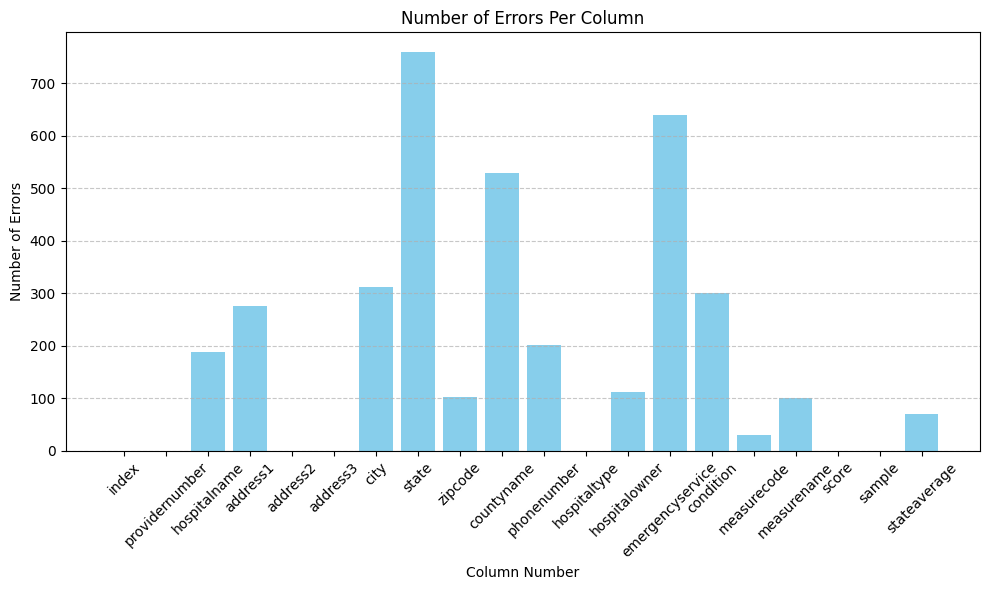

In [78]:
# BART
create_error_bar_chart(bart_mask_df)

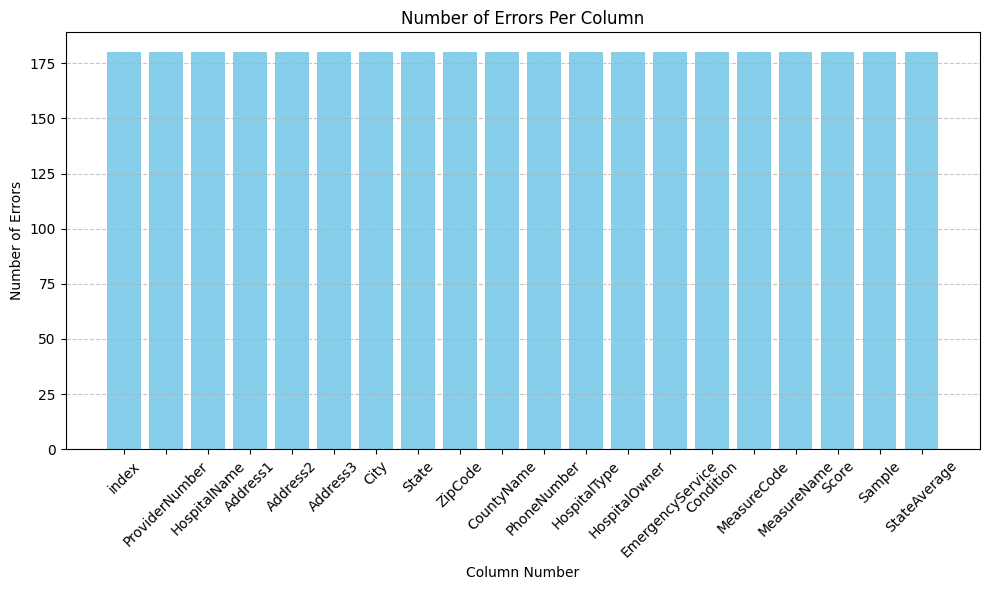

In [79]:
# ECAR
create_error_bar_chart(ecar_mask_df)

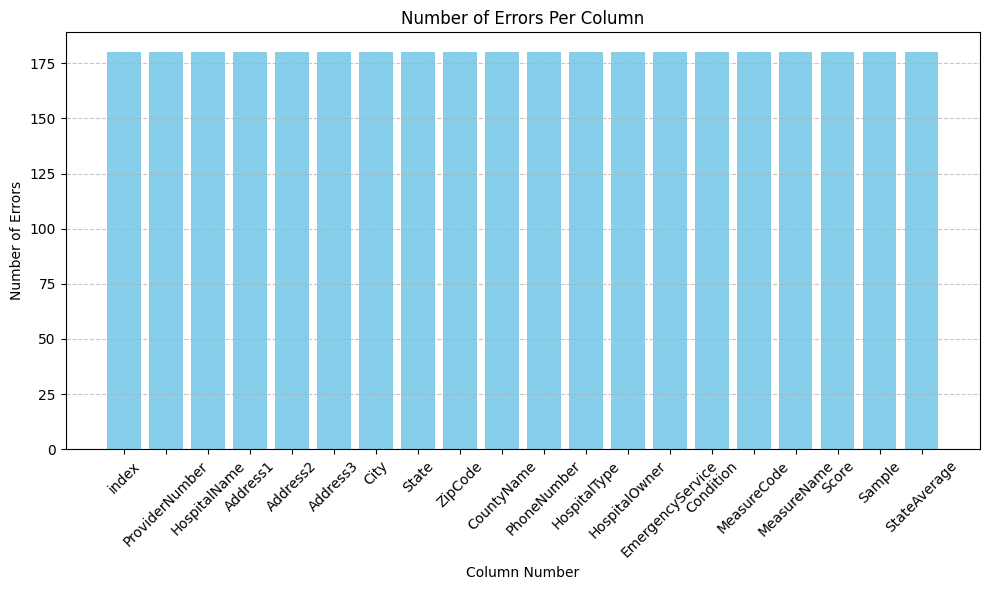

In [80]:
# ENAR
create_error_bar_chart(enar_mask_df)

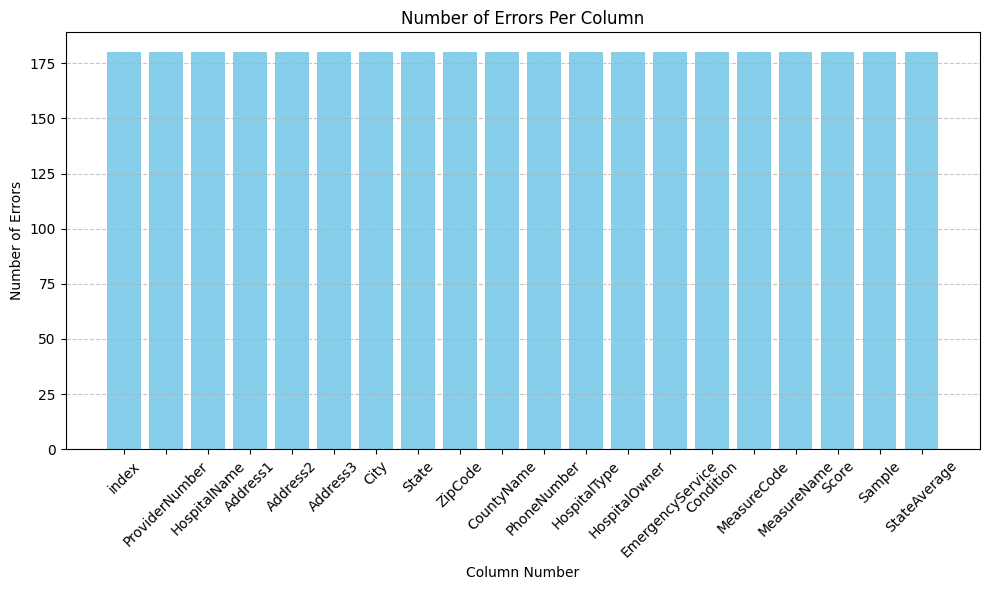

In [81]:
# EAR
create_error_bar_chart(ear_mask_df)